## **1. Install required libraries**

Dependencies note:
- python 3.12.11
- requests 2.32.5
- bs4 0.0.2
- matplotlib 3.10.6
- librosa 0.11.0
- tdqm 4.67.1
- regex 2025.9.18
- opencv-python 4.6.0.66
- pandas 2.3.3
- py-cpuinfo 9.0.0
- pyyaml 6.0.3
- seaborn 0.13.2

In [ ]:
#%pip install selenium
#%pip install yt-dlp

Defaulting to user installation because normal site-packages is not writeable
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached typing_extensions-4.14.1-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 4.2 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.6 MB 8.4 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.6 MB 8.9 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 8.9 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 8.9 MB/s eta 0:00:00
Using cached typing_extensions-4.14.1-py3-none-any.whl (43 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#%pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import subprocess
import sys
import time
import json

from pathlib import Path

import yt_dlp

import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By


from pydub import AudioSegment
from IPython.display import Audio

import matplotlib.pyplot as plt
import librosa
import librosa.display

import whisper

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## **2. Get the Youtube URLs**

In [3]:
def get_channel_videos(channel_url):
    ydl_opts = {
        'extract_flat': True,
        'skip_download': True,
        'quiet': True,
        'forcejson': True,
    }
    urls = []
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        info = ydl.extract_info(channel_url, download=False)
        for entry in info.get('entries', []):
            url = entry.get('url')
            if url and 'shorts' not in url:
                urls.append(url)
    return urls

# Example usage:
channel_url = "https://www.youtube.com/@betterversionvn"
video_links = get_channel_videos(channel_url)
for link in video_links:
    print(link)

{"_type": "url", "ie_key": "Youtube", "id": "0QJx2nRYaJI", "url": "https://www.youtube.com/watch?v=0QJx2nRYaJI", "title": "Don't Let the Latte Factor Keep You Poor | The Latte Factor Book", "description": "Today I would like to share a very simple but extremely useful book on financial management, called \u201cThe Latte Factor\u201d by David Bach and John David Mann. \n\nWhen you identify the \u201cLatte...", "duration": 1556.0, "channel_id": null, "channel": null, "channel_url": null, "uploader": null, "uploader_id": null, "uploader_url": null, "thumbnails": [{"url": "https://i.ytimg.com/vi/0QJx2nRYaJI/hqdefault.jpg?sqp=-oaymwEbCKgBEF5IVfKriqkDDggBFQAAiEIYAXABwAEG&rs=AOn4CLB9MybeY7f3fX4uL6byO1eyaIBr9Q", "height": 94, "width": 168}, {"url": "https://i.ytimg.com/vi/0QJx2nRYaJI/hqdefault.jpg?sqp=-oaymwEbCMQBEG5IVfKriqkDDggBFQAAiEIYAXABwAEG&rs=AOn4CLB5QocesjbJG088i29f4V2H7jV14g", "height": 110, "width": 196}, {"url": "https://i.ytimg.com/vi/0QJx2nRYaJI/hqdefault.jpg?sqp=-oaymwEcCPYBEIoBSF

In [4]:
youtube_urls = []
with open('urls.txt', 'r') as f:
    for line in f.readlines():
        print(line)
        youtube_urls.append(line)

https://www.youtube.com/watch?v=0QJx2nRYaJI

https://www.youtube.com/watch?v=Lb0soPfIkgU

https://www.youtube.com/watch?v=xLiXmyMwlWw

https://www.youtube.com/watch?v=gLPY9aWhYbk

https://www.youtube.com/watch?v=wjbOCSVDxBw

https://www.youtube.com/watch?v=yR8GP3-iYcM

https://www.youtube.com/watch?v=GvaNGoL_1ts

https://www.youtube.com/watch?v=JhrNYwfoOC0

https://www.youtube.com/watch?v=_e2olC-V9nQ

https://www.youtube.com/watch?v=OC_tSVJa_K4

https://www.youtube.com/watch?v=p8H_zeHwXjw

https://www.youtube.com/watch?v=8YbLbVO1adM

https://www.youtube.com/watch?v=etpamQ1QDMo

https://www.youtube.com/watch?v=R6HQh5vHZYE

https://www.youtube.com/watch?v=9smm_ma37RE

https://www.youtube.com/watch?v=nWWmBefpnuI

https://www.youtube.com/watch?v=-b5q6B4JT-8

https://www.youtube.com/watch?v=7yJR0_vwhzk

https://www.youtube.com/watch?v=b4che_r8EU8

https://www.youtube.com/watch?v=FHJf9XOo2oc

https://www.youtube.com/watch?v=7cpsvTgrBl4

https://www.youtube.com/watch?v=cV3MmxTRjDY

https://ww

In [23]:
# Debugging

'''
def get_subtitle_links_selenium(youtube_url):
    downsub_url = f"https://downsub.com/?url={youtube_url}"
    driver = webdriver.Chrome()  # Make sure chromedriver is in your PATH
    driver.get(downsub_url)
    time.sleep(5)  # Wait for JS to load content
    links = driver.find_elements(By.TAG_NAME, "a")
    print("All <a> tag hrefs found on page:")
    for a in links:
        print(a.get_attribute('href'))  # Print every href, even if None
    subtitle_links = [a.get_attribute('href') for a in links if a.get_attribute('href') and (a.get_attribute('href').endswith('.srt') or a.get_attribute('href').endswith('.txt'))]
    driver.quit()
    return subtitle_links

def download_subtitle(url, filename):
    print(f"Attempting to download: {url} as {filename}")  # Debug print
    response = requests.get(url)
    print(f"Status code: {response.status_code}")  # Debug print
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"Downloaded: {filename}")
    else:
        print(f"Failed to download: {url}")

for url in youtube_urls:
    subs = get_subtitle_links_selenium(url)
    print(f"Subtitle links for {url}:")
    print("All found links:", subs)  # Debug print
    if subs:
        for i, sub in enumerate(subs):
            print(sub)
            # Save each .txt file with a unique name
            if sub.endswith('.txt'):
                filename = f"{url.split('=')[-1]}_{i}.txt"
                download_subtitle(sub, filename)
    else:
        print("No subtitles found.")
'''

'\ndef get_subtitle_links_selenium(youtube_url):\n    downsub_url = f"https://downsub.com/?url={youtube_url}"\n    driver = webdriver.Chrome()  # Make sure chromedriver is in your PATH\n    driver.get(downsub_url)\n    time.sleep(5)  # Wait for JS to load content\n    links = driver.find_elements(By.TAG_NAME, "a")\n    print("All <a> tag hrefs found on page:")\n    for a in links:\n        print(a.get_attribute(\'href\'))  # Print every href, even if None\n    subtitle_links = [a.get_attribute(\'href\') for a in links if a.get_attribute(\'href\') and (a.get_attribute(\'href\').endswith(\'.srt\') or a.get_attribute(\'href\').endswith(\'.txt\'))]\n    driver.quit()\n    return subtitle_links\n\ndef download_subtitle(url, filename):\n    print(f"Attempting to download: {url} as {filename}")  # Debug print\n    response = requests.get(url)\n    print(f"Status code: {response.status_code}")  # Debug print\n    if response.status_code == 200:\n        with open(filename, "wb") as f:\n       

## **3. Download the subtitles**

### **Note: Takes about `40 minutes` to run this cell**

In [7]:
def click_txt_button_and_download(youtube_url):
    downsub_url = f"https://downsub.com/?url={youtube_url}"
    driver = webdriver.Chrome()
    driver.get(downsub_url)
    time.sleep(15)  # Wait for JS to load content

    # Try to find the TXT button by its text
    try:
        txt_button = driver.find_element(By.XPATH, "//button[.//span[text()='TXT']]")
        print("Found TXT button, clicking...")
        txt_button.click()
        time.sleep(15)  # Wait for download to start

        # If the download opens a new tab or window, switch to it and get the URL
        if len(driver.window_handles) > 1:
            driver.switch_to.window(driver.window_handles[1])
            txt_url = driver.current_url
            print("TXT file URL:", txt_url)
            driver.close()
            driver.switch_to.window(driver.window_handles[0])
        else:
            # Sometimes the download may trigger a direct file download
            print("Check your downloads folder for the TXT file.")
            txt_url = None

    except Exception as e:
        print("TXT button not found or click failed:", e)
        txt_url = None

    driver.quit()
    return txt_url

for url in youtube_urls:
    txt_url = click_txt_button_and_download(url)
    if txt_url:
        print(f"TXT subtitle URL for {url}: {txt_url}")
        # You can now use requests.get(txt_url) to download the file if needed
    else:
        print(f"No TXT subtitle found for {url}")

Found TXT button, clicking...
Check your downloads folder for the TXT file.
No TXT subtitle found for https://www.youtube.com/watch?v=0QJx2nRYaJI

Found TXT button, clicking...
Check your downloads folder for the TXT file.
No TXT subtitle found for https://www.youtube.com/watch?v=Lb0soPfIkgU

Found TXT button, clicking...
Check your downloads folder for the TXT file.
No TXT subtitle found for https://www.youtube.com/watch?v=xLiXmyMwlWw

Found TXT button, clicking...
Check your downloads folder for the TXT file.
No TXT subtitle found for https://www.youtube.com/watch?v=gLPY9aWhYbk

Found TXT button, clicking...
Check your downloads folder for the TXT file.
No TXT subtitle found for https://www.youtube.com/watch?v=wjbOCSVDxBw

Found TXT button, clicking...
Check your downloads folder for the TXT file.
No TXT subtitle found for https://www.youtube.com/watch?v=yR8GP3-iYcM

Found TXT button, clicking...
Check your downloads folder for the TXT file.
No TXT subtitle found for https://www.yout

## **4. Download the .wav files for the videos**

In [ ]:
# Not working as intended

'''
def download_wav_from_youtubetowav(youtube_url):
    driver = webdriver.Chrome()
    driver.get("https://youtubetowav.com/")
    time.sleep(10)  # Wait for page to load

    # Paste the YouTube URL into the input box
    input_box = driver.find_element(By.ID, "youtube_url")
    input_box.clear()
    input_box.send_keys(youtube_url)
    time.sleep(5)

    # Click the "Tải xuống" button
    download_btn = driver.find_element(By.ID, "youtube_download_btn")
    download_btn.click()
    print("Clicked Tải xuống button.")
    time.sleep(10)  # Wait for conversion and pop-up

    # Close pop-up if it appears (try to find and close)
    try:
        close_btn = driver.find_element(By.CLASS_NAME, "close")
        close_btn.click()
        print("Closed pop-up.")
        time.sleep(1)
    except Exception:
        print("No pop-up to close.")

    # Click the WAV download button
    wav_btn = driver.find_element(By.ID, "downloadButton")
    wav_btn.click()
    print("Clicked WAV download button.")
    time.sleep(10)  # Wait for download to start

    # The file will be downloaded to your browser's default download folder
    driver.quit()

for url in youtube_urls:
    download_wav_from_youtubetowav(url)
'''

In [ ]:
'''
AudioSegment.converter = r"C:\ffmpeg\bin\ffmpeg.exe"
AudioSegment.ffprobe   = r"C:\ffmpeg\bin\ffprobe.exe"

mp3_path = os.path.join("mp3", "test.mp3")
wav_path = os.path.join("wav", "yourfile.wav")

print("MP3 exists:", os.path.isfile(mp3_path))  # Should print True

audio = AudioSegment.from_mp3(mp3_path)
audio.export(wav_path, format="wav")
print("Conversion successful:", os.path.isfile(wav_path))
'''

In [ ]:
'''
# Add ffmpeg bin folder to PATH for the current process
os.environ["PATH"] += os.pathsep + r"C:\ffmpeg\bin"

from pydub import AudioSegment
from pydub.utils import which

print("ffmpeg found at:", which("ffmpeg"))
print("ffprobe found at:", which("ffprobe"))

AudioSegment.converter = r"C:\ffmpeg\bin\ffmpeg.exe"
AudioSegment.ffprobe   = r"C:\ffmpeg\bin\ffprobe.exe"

mp3_path = os.path.join("mp3", "sample.mp3")
wav_path = os.path.join("wav", "yourfile.wav")

print("MP3 exists:", os.path.isfile(mp3_path))  # Should print True

audio = AudioSegment.from_mp3(mp3_path)
audio.export(wav_path, format="wav")
print("Conversion successful:", os.path.isfile(wav_path))
'''

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Admin\AppData\Local\Temp\ipykernel_12780\1771930438.py:1: SyntaxWarning: invalid escape sequence '\A'
  audio_path = "D:\Audio2Text\data_crawling\wav\Cô_đơn_vừa_đủ.wav"


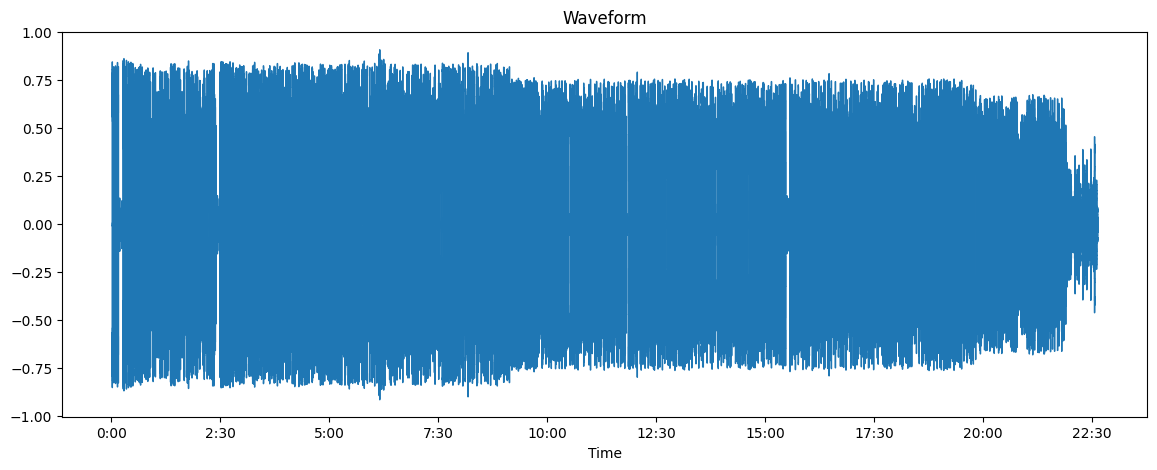

In [8]:
audio_path = "D:\Audio2Text\data_crawling\wav\Cô_đơn_vừa_đủ.wav"
y, sr = librosa.load(audio_path)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()

In [4]:
file_path = r'text\Cô_đơn_vừa_đủ.txt'

try:
    with open(file_path, 'r') as file:
        line = file.readlines()
        print(line)
except FileNotFoundError:
    print(f"File {file_path} not found - please double check your path to the file!")

['Hi xin mến chào tất cả các bạn Chào mừng\n', 'các bạn đã đến với per Vision kênh chia\n', 'sẻ kiến thức phát triển toàn diện bản\n', 'thân qua các cuốn sách\n', '[âm nhạc]\n', 'hay trong hành trình tìm kiếm sự bình an\n', 'Nội tại chúng ta thường nghe câu nói một\n', 'tâm hồn Mạnh Mẽ bắt đầu từ việc tận\n', 'hưởng cô đơn thế nhưng mấy ai thực sự\n', 'hiểu rõ tận hưởng cô đơn là gì tận hưởng\n', 'cô đơn phải chă là có thể sống m mình có\n', 'thể chịu đựng những nỗi buồn lặng lẽ tận\n', 'hưởng cô đơn phải chăng là từ chối kết\n', 'nối xã hội không cần nhiều bạn bè cũng\n', 'chẳng cần có người yêu để rồi tự nhủ\n', 'rằng mu mình tôi thì vẫn ổn liệu rằng\n', 'tận hưởng cô đơn có đang trở thành xu\n', 'hướng khiến nhiều người vô tình xây dựng\n', 'cho mình một bức tường vô hình ngăn cách\n', 'bản thân mình với thế giới bên ngoài nhà\n', 'tâm lý học Hồ thận Chi còn nói những\n', 'hành vi gê nghiện lặp lại một cách cưỡng\n', 'chế đằng sau chúng đều thể hiện rằng bạn\n', 'chưa thể xử lý được

## **5. Align the text to the audio:**

### **Note: takes another `50 minutes` to run the cell below**

In [ ]:
# Load the Whisper model
model = whisper.load_model("base")

wav_files = os.listdir('wav')
txt_files = os.listdir('text')

for wav in wav_files:
    print(file)

3_thứ_xiềng_xích.wav
3_Trí_tuệ_cần_học.wav
4_bước_lấy_lại.wav
5_ngôn_ngữ.wav
Bóng_tối_không_đến.wav
Chữa_lành_cơ_thể_2.wav
Cách_bạn_sử_dụng.wav
Cách_chữa_lành_cơ_thể.wav
Cách_vực_dậy_khỏi.wav
Cách_để_đời_nhẹ_2.wav
Cánh_cổng_bước_đến_1.wav
Cô_đơn_vừa_đủ.wav
Dấu_hiệu_bạn_đã.wav
Hai_tư_duy.wav
Hãy_kê_một_toa_thuốc.wav
Hướng_dẫn_thiền_chánh_niệm.wav
Không_phải_bạn_nóng.wav
Kế_hoạch_toàn_diện_1.wav
Kỹ_năng_kiếm_tiền.wav
Lối_sống_giúp_bản_thân.wav
Muốn_sống_vui_khoẻ_1.wav
Muốn_được_tự_tại.wav
Một_Bước_Quan_Trọng.wav
Một_tâm_hồn_lớn_mạnh.wav
Người_càng_có_nội_tâm.wav
Người_giam_cầm_được.wav
Ngừng_gây_mê_bản_thân.wav
Nhiệm_vụ_cốt_lõi.wav
Những_gì_quan_trọng.wav
Pháp_sống_thoát_khỏi.wav
Phương_pháp_tự_học.wav
Phương_pháp_để_sống.wav
Sống_Tỉnh_Thức.wav
Sự_thôi_thúc_truy_cầu.wav
Thế_nào_mới_là_1.wav
Thế_nào_mới_là_2.wav
Thế_nào_mới_là_mục_tiêu.wav
Trong_tình_yêu.wav
Trò_chơi_giới_hạn.wav
Tìm_lại_chính_mình.wav
Đừng_Lấy_Lòng_Bất_Kỳ_Ai.wav
Đừng_để_Nhân_tố_Latte.wav
Đừng_ở_trong_hạnh_phúc.wav


In [ ]:
# Make sure that the length of both directories are the same
if len(wav_files) == len(txt_files):
    for i in range(len(wav_files)):
        # Construct full file paths
        audio_file = os.path.join('wav', wav_files[i])
        subtitle_file = os.path.join('text', txt_files[i])
        
        print(f"\n--- Processing file {i+1}/{len(wav_files)} ---")
        print(f"Audio file: {wav_files[i]}")
        print(f"Text file: {txt_files[i]}")

        # Check if files exist
        print(f"Checking for audio file: {audio_file}")
        if not os.path.exists(audio_file):
            print(f"Audio file not found: {audio_file}")
            continue

        print(f"Checking for text file: {subtitle_file}")
        if not os.path.exists(subtitle_file):
            print(f"Text file not found: {subtitle_file}")
            continue

        # If both files exist, proceed with transcription
        if os.path.exists(audio_file) and os.path.exists(subtitle_file):
            print("Files found! Loading audio with librosa...")
            
            # Load audio using librosa (this bypasses FFmpeg issues)
            audio_data, sample_rate = librosa.load(audio_file, sr=16000)  # Whisper expects 16kHz
            
            print("Starting transcription with word timestamps...")
            
            # Transcribe the audio to get word-level timestamps
            result = model.transcribe(
                audio_data,  # Pass the numpy array instead of file path
                language='vi',  # Vietnamese language code
                word_timestamps=True,
                verbose=True
            )
            
            # Save the results with a unique filename
            base_name = os.path.splitext(wav_files[i])[0]  # Remove .wav extension
            file_name = f'whisper_alignment_{base_name}.json'
            with open(file_name, 'w', encoding='utf-8') as f:
                json.dump(result, f, ensure_ascii=False, indent=2, default=str)
            
            print(f"Word-level timestamps generated and saved to {file_name}!")
            
            # Display sample results
            print("\nSample output:")
            for j, segment in enumerate(result['segments'][:3]):  # Show first 3 segments
                print(f"\nSegment {j+1}:")
                print(f"Time: {segment['start']:.2f}s - {segment['end']:.2f}s")
                print(f"Text: {segment['text']}")
                
                if 'words' in segment:
                    print("Word timestamps:")
                    for word in segment['words'][:5]:  # Show first 5 words
                        print(f"  '{word['word']}' at {word['start']:.2f}s - {word['end']:.2f}s")
        else:
            print("Cannot proceed without both audio and text files.")
else:
    print(f"Mismatch in file counts: {len(wav_files)} wav files vs {len(txt_files)} text files")
    # List available files in wav directory
    wav_dir = Path('wav')
    if wav_dir.exists():
        print("Available WAV files:")
        for f in wav_dir.glob('*.wav'):
            print(f"  {f}")

    # List available files in text directory  
    text_dir = Path('text')
    if text_dir.exists():
        print("Available text files:")
        for f in text_dir.glob('*.txt'):
            print(f"  {f}")

Loading Whisper model...

--- Processing file 1/43 ---
Audio file: 3_thứ_xiềng_xích.wav
Text file: 3_thứ_xiềng_xích.txt
Checking for audio file: wav\3_thứ_xiềng_xích.wav
Checking for text file: text\3_thứ_xiềng_xích.txt
Files found! Loading audio with librosa...

--- Processing file 1/43 ---
Audio file: 3_thứ_xiềng_xích.wav
Text file: 3_thứ_xiềng_xích.txt
Checking for audio file: wav\3_thứ_xiềng_xích.wav
Checking for text file: text\3_thứ_xiềng_xích.txt
Files found! Loading audio with librosa...
Starting transcription with word timestamps...
Starting transcription with word timestamps...


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\whisper\transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


[00:00.000 --> 00:04.720]  2 xin biến rào tất cả các bạn, cho mình các bạn đã quay trở lại với Battle of the Risen,
[00:05.040 --> 00:08.960]  kênh chí giải kênh thức, phát triển đoàn diện bàn thân, qua các cuốn xác hai.
[00:15.420 --> 00:22.740]  Mòn đã từng nói, đời người có 2 báo vật, 1 là tự do tự tưởng, 2 là tự do đi lại.
[00:23.440 --> 00:29.280]  Tìa nhiên, dù vấn lần chúng ta được xinh ra trong tự do, nhưng mấy ai chạm tới đường sự tự do đi thưởng.
[00:30.220 --> 00:35.360]  Hầu hết mọi người đều đang tự đèo lên mình những gông cúng vô hình, biến hành trình cuộc đời
[00:35.360 --> 00:38.520]  trở thành một cuộc chiến không ngừng nghỉ để giải phóng bàn thân.
[00:39.280 --> 00:43.560]  Nhưng tại sao dù đã nỗ lực bao nhiêu, chúng ta vẫn chưa thể thực sự thoát hỏi.
[00:44.340 --> 00:48.800]  Mình những chiến nằm ở bà lại dinh xếp chủ yêu mà bất kỳ ai cũng phải đối mặt.
[00:49.280 --> 00:54.760]  Đó là những gông cúng mà chúng ta thường thiếu đi sự tình thức và dũng cảm để giết hoát

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\whisper\transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


[00:00.000 --> 00:04.840]  2 xin mình chào các bạn, trong mình các bạn đã quay trở lại với Battle Vyzen
[00:04.840 --> 00:09.960]  kênh chia sẻ kinh thức, phát triển tàn dịp bản thân qua các quân sách hai
[00:14.840 --> 00:22.800]  Hôm nay Battle Vyzen xin giới thiệu tới bạn một quân sách phố quân Thú Vi mà mình tạm dịch là chỉ uệ của lại sỏi
[00:23.700 --> 00:30.740]  Trong khi các tóc phẩm chia học, tiểu sử hay tâm lý học mà chúng ta đã từng tìm hiểu trước kia, thường xoay quan con người
[00:30.740 --> 00:36.280]  thì quân sách ngày hôm nay lại tập trung vào một đôi tượng đặc biệt, đỏ chính là sỏi
[00:37.000 --> 00:40.680]  Đọc quân sách này bạn sẽ không khỏi nhớ nhiên và thấy rằng
[00:40.680 --> 00:50.380]  lại giá trước kia mà văn hóa đại chúng vẫn gắn cho nó hình ảnh uống ám, đầy xác hi và tàn đọc đó, thực chất lại là một chia dã của dừng hoang
[00:23.700 --> 00:30.740]  Trong khi các tóc phẩm chia học, tiểu sử hay tâm lý học mà chúng ta đã từng tìm hiểu trước kia, thường xoay qua

In [11]:
json_alignment_files = os.listdir('json_alignment')

for file in json_alignment_files:
    print(file)

whisper_alignment_3_thứ_xiềng_xích.json
whisper_alignment_3_Trí_tuệ_cần_học.json
whisper_alignment_4_bước_lấy_lại.json
whisper_alignment_5_ngôn_ngữ.json
whisper_alignment_Bóng_tối_không_đến.json
whisper_alignment_Chữa_lành_cơ_thể_2.json
whisper_alignment_Cách_bạn_sử_dụng.json
whisper_alignment_Cách_chữa_lành_cơ_thể.json
whisper_alignment_Cách_vực_dậy_khỏi.json
whisper_alignment_Cách_để_đời_nhẹ_2.json
whisper_alignment_Cánh_cổng_bước_đến_1.json
whisper_alignment_Cô_đơn_vừa_đủ.json
whisper_alignment_Dấu_hiệu_bạn_đã.json
whisper_alignment_Hai_tư_duy.json
whisper_alignment_Hãy_kê_một_toa_thuốc.json
whisper_alignment_Hướng_dẫn_thiền_chánh_niệm.json
whisper_alignment_Không_phải_bạn_nóng.json
whisper_alignment_Kế_hoạch_toàn_diện_1.json
whisper_alignment_Kỹ_năng_kiếm_tiền.json
whisper_alignment_Lối_sống_giúp_bản_thân.json
whisper_alignment_Muốn_sống_vui_khoẻ_1.json
whisper_alignment_Muốn_được_tự_tại.json
whisper_alignment_Một_Bước_Quan_Trọng.json
whisper_alignment_Một_tâm_hồn_lớn_mạnh.json
whi

## **6. Splitting the audio and subtitles into 30 seconds sections**

In [13]:
'''
def split_audio_with_subtitles(audio_file_path, alignment_file_path, output_dir="output_segments"):
    """
    Split audio file based on alignment data and create subtitle files
    
    Args:
        audio_file_path: Path to the original audio file
        alignment_file_path: Path to the whisper alignment JSON file
        output_dir: Directory to save the split audio files and subtitles
    """
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Load the alignment data
    with open(alignment_file_path, 'r', encoding='utf-8') as f:
        alignment_data = json.load(f)
    
    # Load the audio file
    print("Loading audio file...")
    audio = AudioSegment.from_file(audio_file_path)
    
    # Extract segments
    segments = alignment_data.get('segments', [])
    
    print(f"Found {len(segments)} segments to process")
    
    for i, segment in enumerate(segments):
        # Format segment number with zero padding
        segment_num = f"{i:02d}"
        
        # Extract timing information (convert to milliseconds)
        start_time = segment['start'] * 1000  # pydub works in milliseconds
        end_time = segment['end'] * 1000
        
        # Extract the audio segment
        audio_segment = audio[start_time:end_time]
        
        # Save audio file
        audio_filename = f"{segment_num}.wav"
        audio_path = os.path.join(output_dir, audio_filename)
        audio_segment.export(audio_path, format="wav")
        
        # Create subtitle data
        subtitle_data = {
            "segment_id": i,
            "start_time": segment['start'],
            "end_time": segment['end'],
            "duration": segment['end'] - segment['start'],
            "text": segment['text'].strip(),
            "audio_file": audio_filename
        }
        
        # Save as JSON file
        json_filename = f"{segment_num}.json"
        json_path = os.path.join(output_dir, json_filename)
        with open(json_path, 'w', encoding='utf-8') as f:
            json.dump(subtitle_data, f, indent=2, ensure_ascii=False)
        
        # Also save as simple text file
        txt_filename = f"{segment_num}.txt"
        txt_path = os.path.join(output_dir, txt_filename)
        with open(txt_path, 'w', encoding='utf-8') as f:
            f.write(segment['text'].strip())
        
        print(f"Processed segment {segment_num}: {segment['text'][:50]}...")
    
    # Create a summary file
    summary_data = {
        "total_segments": len(segments),
        "original_audio": audio_file_path,
        "segments_info": [
            {
                "id": f"{i:02d}",
                "start": seg['start'],
                "end": seg['end'],
                "text": seg['text'].strip()
            }
            for i, seg in enumerate(segments)
        ]
    }
    
    summary_path = os.path.join(output_dir, "summary.json")
    with open(summary_path, 'w', encoding='utf-8') as f:
        json.dump(summary_data, f, indent=2, ensure_ascii=False)
    
    print(f"\n✅ Processing complete!")
    print(f"📁 Output directory: {output_dir}")
    print(f"🎵 Created {len(segments)} audio files (.wav)")
    print(f"📝 Created {len(segments)} subtitle files (.json and .txt)")
    print(f"📋 Created summary.json with overview")
'''

# Alternative function if you want more control over segment grouping
def split_audio_by_duration(audio_file_path, alignment_file_path, target_duration=30, output_dir="output_segments_grouped"):
    """
    Split audio into segments of approximately target_duration seconds
    """
    # Extract the base name of the audio file (without path and extension)
    audio_base_name = os.path.splitext(os.path.basename(audio_file_path))[0]
    
    # Create the subfolder path: output_dir/audio_file_name/
    final_output_dir = os.path.join(output_dir, audio_base_name)
    os.makedirs(final_output_dir, exist_ok=True)
    
    print(f"Creating output directory: {final_output_dir}")
    
    with open(alignment_file_path, 'r', encoding='utf-8') as f:
        alignment_data = json.load(f)
    
    audio = AudioSegment.from_file(audio_file_path)
    segments = alignment_data.get('segments', [])
    
    grouped_segments = []
    current_group = []
    current_duration = 0
    
    for segment in segments:
        segment_duration = segment['end'] - segment['start']
        
        if current_duration + segment_duration > target_duration and current_group:
            grouped_segments.append(current_group)
            current_group = [segment]
            current_duration = segment_duration
        else:
            current_group.append(segment)
            current_duration += segment_duration
    
    if current_group:
        grouped_segments.append(current_group)
    
    for i, group in enumerate(grouped_segments):
        segment_num = f"{i:02d}"
        
        # Get timing from first and last segment in group
        start_time = group[0]['start'] * 1000
        end_time = group[-1]['end'] * 1000
        
        # Extract audio
        audio_segment = audio[start_time:end_time]
        audio_filename = f"{segment_num}.wav"
        audio_path = os.path.join(final_output_dir, audio_filename)  # Use final_output_dir
        audio_segment.export(audio_path, format="wav")
        
        # Combine text from all segments in group
        combined_text = " ".join([seg['text'].strip() for seg in group])
        
        # Create subtitle data
        subtitle_data = {
            "segment_id": i,
            "start_time": group[0]['start'],
            "end_time": group[-1]['end'],
            "duration": group[-1]['end'] - group[0]['start'],
            "text": combined_text,
            "audio_file": audio_filename,
            "individual_segments": group
        }
        
        # Save files
        json_filename = f"{segment_num}.json"
        json_path = os.path.join(final_output_dir, json_filename)  # Use final_output_dir
        with open(json_path, 'w', encoding='utf-8') as f:
            json.dump(subtitle_data, f, indent=2, ensure_ascii=False)
        
        txt_filename = f"{segment_num}.txt"
        txt_path = os.path.join(final_output_dir, txt_filename)  # Use final_output_dir
        with open(txt_path, 'w', encoding='utf-8') as f:
            f.write(combined_text)
        
        print(f"Created grouped segment {segment_num} ({len(group)} original segments)")
    
    print(f"\n✅ Processing complete for {audio_base_name}!")
    print(f"📁 Output directory: {final_output_dir}")
    print(f"🎵 Created {len(grouped_segments)} audio segments")

In [16]:
for i in range(len(wav_files)):
    # Construct full file paths
    audio_file_path = os.path.join('wav', wav_files[i])
    alignment_file_path = os.path.join('json_alignment', json_alignment_files[i])
    
    # Check if files exist before processing
    if not os.path.exists(audio_file_path):
        print(f"ERROR: Audio file not found: {audio_file_path}")
        continue
        
    if not os.path.exists(alignment_file_path):
        print(f"ERROR: Alignment file not found: {alignment_file_path}")
        continue
    
    split_audio_by_duration(audio_file_path, alignment_file_path, target_duration=30, output_dir="output_segments_grouped")

Creating output directory: output_segments_grouped\3_thứ_xiềng_xích
Created grouped segment 00 (5 original segments)
Created grouped segment 01 (6 original segments)
Created grouped segment 02 (4 original segments)
Created grouped segment 03 (3 original segments)
Created grouped segment 04 (3 original segments)
Created grouped segment 05 (3 original segments)
Created grouped segment 06 (4 original segments)
Created grouped segment 07 (6 original segments)
Created grouped segment 08 (5 original segments)
Created grouped segment 09 (5 original segments)
Created grouped segment 10 (5 original segments)
Created grouped segment 11 (3 original segments)
Created grouped segment 12 (3 original segments)
Created grouped segment 13 (3 original segments)
Created grouped segment 14 (5 original segments)
Created grouped segment 15 (3 original segments)
Created grouped segment 16 (4 original segments)
Created grouped segment 17 (6 original segments)
Created grouped segment 18 (7 original segments)
C

## **7. Results!!**

### **Lets have a look at some random sections:**

In [50]:
json_file_09 = r'output_segments_grouped\5_ngôn_ngữ\09.json'
wav_file_09 = r'output_segments_grouped\5_ngôn_ngữ\09.wav'
txt_file_09 = r'output_segments_grouped\5_ngôn_ngữ\09.txt'

try:
    # Open the JSON file in read mode ('r')
    with open(json_file_09, 'r') as file:
        # Use json.load() to parse the JSON content from the file
        # and convert it into a Python dictionary
        data = json.load(file)
    
    # Print the loaded data and its type to verify
    print("Loaded JSON data:")
    print(data)
    print("------------------")
    print("Segment ID:", data['segment_id'])
    print("Text:", data['text'])

    tokens = []
    for segment in data['individual_segments']:
        tokens.append(segment['tokens'])
    print("Tokens:", tokens)
    print("Duration:", data['duration'], 'seconds')
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from '{file_path}'. Check the file's format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Loaded JSON data:
{'segment_id': 9, 'start_time': 275.82, 'end_time': 306.84, 'duration': 31.019999999999982, 'text': 'và câu trả lời ở đây, đó là không? Bởi vì thực tế khi trải nghiệm xa mê kết thúc, mở là lúc tính yêu đích thực có cơ hội được phát triển, tuy nhiên tính yêu thật sự đời hỏi sự nỗ lực và kiến lật, chính vì thế không về ai cũng biết cách yêu người khác thực sự. Đây là một lựa chọn có ý thức, đầu từ thời gian và công sức, để mang lại sự có ích và phát triển cho đôi phương. Khi thể đôi phương trở nên tốt hơn nhờ sự trăm sóc của mình, chúng ta cảm nhận được sự hai lòng xô xác,', 'audio_file': '09.wav', 'individual_segments': [{'id': 52, 'seek': 25652, 'start': 275.82, 'end': 278.24, 'text': ' và câu trả lời ở đây, đó là không?', 'tokens': [51264, 10274, 19288, 84, 504, 7398, 287, 21024, 19272, 20199, 11, 17647, 3684, 11415, 30, 51464], 'temperature': 0.0, 'avg_logprob': -0.243886634786293, 'compression_ratio': 1.5795454545454546, 'no_speech_prob': 0.41066858172416687, 'word

và câu trả lời ở đây, đó là không? Bởi vì thực tế khi trải nghiệm **`xa`** mê kết thúc, mở là lúc tính yêu đích thực có cơ hội được phát triển, tuy nhiên tính yêu thật sự **`đời`** hỏi sự nỗ lực và **`kiến lật`**, chính vì thế không về ai cũng biết cách yêu người khác thực sự. Đây là một lựa chọn có ý thức, đầu từ thời gian và công sức, để mang lại sự có ích và phát triển cho đôi phương. Khi thể đôi phương trở nên tốt hơn nhờ sự **`trăm`** sóc của mình, chúng ta cảm nhận được sự hai lòng **`xô xác`**,

In [51]:
Audio(wav_file_09)

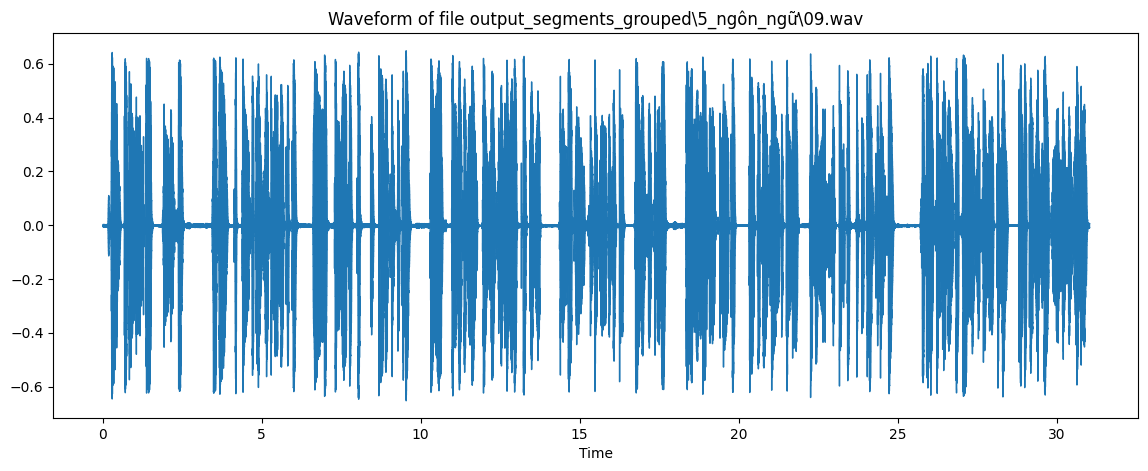

In [52]:
y, sr = librosa.load(wav_file_09)

plt.figure(figsize=(14, 5), frameon=True)
librosa.display.waveshow(y, sr=sr)
plt.title(f"Waveform of file {wav_file_09}")
plt.show()


In [55]:
json_file_07 = r'output_segments_grouped\Kỹ_năng_kiếm_tiền\07.json'
wav_file_07 = r'output_segments_grouped\Kỹ_năng_kiếm_tiền\07.wav'
txt_file_07 = r'output_segments_grouped\Kỹ_năng_kiếm_tiền\07.txt'

try:
    # Open the JSON file in read mode ('r')
    with open(json_file_07, 'r') as file:
        # Use json.load() to parse the JSON content from the file
        # and convert it into a Python dictionary
        data = json.load(file)
    
    # Print the loaded data and its type to verify
    print("Loaded JSON data:")
    print(data)
    print("------------------")
    print("Segment ID:", data['segment_id'])
    print("Text:", data['text'])

    tokens = []
    for segment in data['individual_segments']:
        tokens.append(segment['tokens'])
    print("Tokens:", tokens)
    print("Duration:", data['duration'], 'seconds')
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from '{file_path}'. Check the file's format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Loaded JSON data:
{'segment_id': 7, 'start_time': 220.02, 'end_time': 251.42, 'duration': 31.399999999999977, 'text': 'mà sẽ là điều tất yêu khi bạn có sự hiểu biết và vận dụng đúng các nguyên tắc kiếm tiền và làm dầu vì thì những nguyên tắc để dầu có thực sự đó là gì nguyên tắc của lỗi đầu tiên đó là tiềm kiếm sự dầu có chứ không phải tiền bạc hay địa vị nói về sự dầu có trước tiền bạn cần hỏi bản thân mình một câu rằng bạn có đang khau khác sự dầu có hoặc bạn có đang tránh nế sự dầu có', 'audio_file': '07.wav', 'individual_segments': [{'id': 77, 'seek': 19572, 'start': 220.02, 'end': 223.24, 'text': ' mà sẽ là điều tất yêu khi bạn có sự hiểu biết', 'tokens': [51592, 13901, 17208, 3684, 42082, 256, 12436, 49107, 23526, 14647, 6333, 33602, 4879, 40328, 28432, 51752], 'temperature': 0.0, 'avg_logprob': -0.3259898627676615, 'compression_ratio': 1.6830769230769231, 'no_speech_prob': 0.04832432046532631, 'words': [{'word': ' mà', 'start': 220.02, 'end': 220.58, 'probability': 0.85764861106

mà sẽ là điều tất yêu khi bạn có sự hiểu biết và vận dụng đúng các nguyên tắc kiếm tiền và làm `dầu` vì thì những nguyên tắc để `dầu` có thực sự đó là gì nguyên tắc của lỗi đầu tiên đó là `tiềm kiếm` sự dầu có chứ không phải tiền bạc hay địa vị nói về sự dầu có trước tiền bạn cần hỏi bản thân mình một câu rằng bạn có đang `khau khác` sự dầu có hoặc bạn có đang `tránh nế` sự dầu có